In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore') # Code for stopping warnings (deprecation warning, etc.)
pd.set_option('display.max_columns', None) # Code for showing all columns in the dateset, withoud '...' in between.


# Preparing the data

In [2]:
data = pd.read_csv('../raw_data/people_train.csv')

In [3]:
data.head(10)

,employee_id,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Non-Travel,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,job_role_Healthcare Representative,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single
0,456,-0.500000,0,-0.340456,-0.166667,3,4,1,-0.972222,2,2,3,0.240007,-0.694698,-0.333333,0,-0.166667,3,3,3,0.111111,-1.0,3,0.833333,1.2,0.000000,-0.2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,485,-0.250000,1,-0.653846,-0.166667,3,4,1,-0.861111,3,1,3,-0.359003,-0.394561,-0.333333,1,-0.166667,3,2,0,-0.888889,-1.0,3,-0.666667,-0.6,-0.333333,-0.6,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1049,0.750000,0,-0.029915,1.416667,4,2,0,-0.805556,3,1,2,-0.482582,-0.461706,-0.333333,0,0.333333,3,1,0,-0.333333,0.0,3,0.166667,0.0,-0.333333,0.2,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1102,-0.666667,0,0.122507,0.666667,2,1,0,-0.416667,3,1,3,-0.477081,0.681382,-0.333333,0,0.333333,3,4,1,-0.555556,2.0,2,-0.166667,-0.2,0.333333,-0.2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,806,-0.500000,0,0.159544,-0.500000,3,4,0,-0.750000,1,1,3,-0.178951,0.834154,0.333333,0,1.166667,4,3,2,-0.222222,-1.0,3,-0.500000,-0.2,-0.333333,-0.2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,437,-0.750000,0,0.809117,-0.416667,3,4,0,0.250000,3,2,3,-0.060689,-0.709951,-0.333333,1,-0.500000,3,1,0,-0.444444,0.0,3,0.000000,0.2,-0.333333,0.2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,606,0.750000,0,-0.353276,-0.416667,3,4,0,-0.111111,3,2,2,-0.000733,0.172545,-0.666667,0,0.833333,3,2,1,0.000000,0.0,4,0.500000,0.8,0.666667,0.8,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
7,267,0.083333,0,-0.739316,1.166667,3,2,0,0.000000,4,1,1,-0.228273,0.721330,-0.333333,1,-0.333333,3,1,1,-0.111111,0.0,2,0.500000,0.8,0.000000,0.8,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,1077,-1.333333,1,-0.056980,0.166667,3,4,1,-0.305556,3,1,4,-0.455812,0.255508,-0.333333,1,0.000000,3,2,0,-0.777778,0.0,3,-0.500000,-0.2,-0.333333,-0.2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,1815,0.416667,0,-0.018519,-0.250000,1,3,1,0.444444,3,3,3,1.033737,1.002260,-0.666667,1,-0.166667,3,4,1,1.555556,0.0,4,2.833333,2.2,4.000000,0.4,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [4]:
data.shape

(1029, 51)

In [5]:
data['attrition'].value_counts()

0    862
1    167
Name: attrition, dtype: int64

In [6]:
data.attrition.value_counts(dropna=False)

0    862
1    167
Name: attrition, dtype: int64

In [7]:
X = data.drop(columns='attrition')
Y = data['attrition']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 1)

# Modelling

### Logistic Regression Classifier

In [9]:
# Instanciate the model
log_model = LogisticRegression(class_weight= 'balanced')

# # # Train the model on the Training data
log_model.fit(X_train, Y_train)

# # # Score the model on the Training data
log_model.score(X_test,Y_test)

0.7216828478964401

In [10]:
Y_pred = log_model.predict(X_test)

print(classification_report(Y_pred, Y_test))

#precision: out of all the data we classified as 1, which ones were actually 1? (TP/ (TP+FP)
#recall: out of all the data that belongs in category 1, which ones have we successfully identified as such? (TP/ (TP+FN))
#f1-score: balance between precision and recall (2* (Precision * Recall) / (Precision + Recall))
#accuracy: ratio of correct prediction ((TP + TN) / n)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       203
           1       0.69      0.34      0.46       106

    accuracy                           0.72       309
   macro avg       0.71      0.63      0.63       309
weighted avg       0.72      0.72      0.69       309



### Random Forest Classifier

In [11]:
forest = RandomForestClassifier(n_estimators=100)

cv_results = cross_validate(forest, X, Y, scoring = "accuracy", cv=10)

print(cv_results['test_score'])
print('mean accuracy : ',cv_results['test_score'].mean())
print('std accuracy: ', cv_results['test_score'].std())

[0.87378641 0.86407767 0.85436893 0.85436893 0.85436893 0.85436893
 0.86407767 0.84466019 0.87378641 0.84313725]
mean accuracy :  0.8581001332571863
std accuracy:  0.010118238216388456


### KNN classifier

In [12]:
N = range(3,100)

accuracies = []

for n in tqdm(N):
    
    knn_model = KNeighborsClassifier(n_neighbors = n)


    # Train the model using the training sets
    knn_model.fit(X_train, Y_train)

    #Predict Output
    predicted = knn_model.predict(X_test) 
    
    accuracies.append((n, np.sum(predicted == Y_test)/len(Y_test)))

   



In [13]:
accuracies[np.argmax([x[1] for x in accuracies])]

(14, 0.8317152103559871)

In [14]:
Y_pred = knn_model.predict(X_test)

print(classification_report(Y_pred, Y_test))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91       309
           1       0.00      0.00      0.00         0

    accuracy                           0.83       309
   macro avg       0.50      0.42      0.45       309
weighted avg       1.00      0.83      0.91       309



## Oversampling

In [15]:
sm = SMOTE(random_state = 55)

In [16]:
X_train_new, Y_train_new = sm.fit_sample(X_train, Y_train.ravel())

<AxesSubplot:>

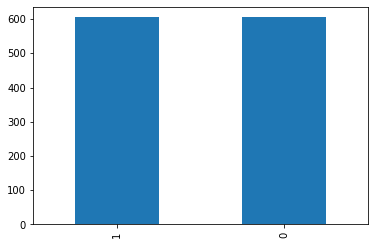

In [17]:
# observe that data has been balanced
pd.Series(Y_train_new).value_counts().plot.bar()


## Modelling after oversampling

### Logistic Regression Classifier

In [18]:
# Instanciate the model
log_model = LogisticRegression()

# # # Train the model on the Training data
log_model.fit(X_train_new, Y_train_new)

# # # Score the model on the Training data
log_model.score(X_test,Y_test)

0.8317152103559871

In [19]:
Y_pred = log_model.predict(X_test)

print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       253
           1       0.54      0.50      0.52        56

    accuracy                           0.83       309
   macro avg       0.71      0.70      0.71       309
weighted avg       0.83      0.83      0.83       309



### KNN classifier

In [20]:
N = range(3,100)

accuracies = []

for n in tqdm(N):
    
    knn_model = KNeighborsClassifier(n_neighbors = n)


    # Train the model using the training sets
    knn_model.fit(X_train_new, Y_train_new)

    #Predict Output
    predicted = knn_model.predict(X_test) 
    
    accuracies.append((n, np.sum(predicted == Y_test)/len(Y_test)))

In [21]:
accuracies[np.argmax([x[1] for x in accuracies])]

(4, 0.6148867313915858)

In [22]:
Y_pred = knn_model.predict(X_test)

print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71       189
           1       0.40      0.17      0.24       120

    accuracy                           0.58       309
   macro avg       0.51      0.51      0.48       309
weighted avg       0.53      0.58      0.53       309

